In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

# 전처리

In [40]:
df = pd.read_csv('../../preprocessed/data.csv')
df.dropna(inplace=True)

In [41]:
x = df.drop(columns=['단지명','주소', '거래금액(만원)','계약년월'])
preset = df[['계약년월','거래금액(만원)']]

## 가격지수 나누기

In [42]:
# .loc 사용하여 안전하게 값 변경
preset.loc[:, '거래금액(만원)'] = preset['거래금액(만원)'].str.replace(',', '', regex=False).astype(float)
preset.loc[:, '계약년월'] = preset['계약년월'].astype(str)

price_index = pd.read_csv('../../preprocessed/가격지수/price_index.csv')

# 가격 지수를 행으로 변환
price_index = price_index.T
price_index.columns = ['price_index']
price_index = price_index.reset_index().rename(columns={'index': '계약년월'})

# preset과 price_index를 '계약년월' 기준으로 병합
merged_df = pd.merge(preset, price_index, on='계약년월', how='left')
merged_df = merged_df.fillna(100)
merged_df['조정된 거래금액(만원)'] = merged_df['거래금액(만원)'] / merged_df['price_index'] * 100

/var/folders/rw/n5njc9xj6818lwcj0l_fr9200000gn/T/ipykernel_8405/3368251030.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['202408' '202408' '202408' ... '202108' '202108' '202108']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  preset.loc[:, '계약년월'] = preset['계약년월'].astype(str)
/var/folders/rw/n5njc9xj6818lwcj0l_fr9200000gn/T/ipykernel_8405/3368251030.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = merged_df.fillna(100)


In [43]:
y = merged_df['조정된 거래금액(만원)']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 랜덤포레스트

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

# 선형회귀모델

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# 의사결정트리

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

# KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

# XGBOOST

In [16]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# LightGBM

In [17]:
from lightgbm import LGBMRegressor
gbm = LGBMRegressor()
gbm.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5842
[LightGBM] [Info] Number of data points in the train set: 14746, number of used features: 26
[LightGBM] [Info] Start training from score 26644.998619


LGBMRegressor()

# Ridge, Lasso

In [18]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [19]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

# 그라디언트 부스팅

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

# Catboost

In [21]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(x_train, y_train)

Learning rate set to 0.062637
0:	learn: 14048.7925380	total: 61.4ms	remaining: 1m 1s
1:	learn: 13343.3274121	total: 64ms	remaining: 31.9s
2:	learn: 12703.6033030	total: 66.3ms	remaining: 22s
3:	learn: 12091.7545511	total: 68.5ms	remaining: 17.1s
4:	learn: 11521.6613495	total: 70.9ms	remaining: 14.1s
5:	learn: 11024.9161943	total: 73.4ms	remaining: 12.2s
6:	learn: 10534.6976894	total: 75.6ms	remaining: 10.7s
7:	learn: 10092.1116861	total: 78.1ms	remaining: 9.68s
8:	learn: 9683.7779110	total: 80.3ms	remaining: 8.84s
9:	learn: 9266.6265520	total: 82.6ms	remaining: 8.17s
10:	learn: 8905.7190575	total: 85ms	remaining: 7.64s
11:	learn: 8569.4452274	total: 87.3ms	remaining: 7.18s
12:	learn: 8262.9411218	total: 89.7ms	remaining: 6.81s
13:	learn: 7961.3255361	total: 92.2ms	remaining: 6.5s
14:	learn: 7677.5069344	total: 94.6ms	remaining: 6.21s
15:	learn: 7425.9462362	total: 96.8ms	remaining: 5.95s
16:	learn: 7173.5022421	total: 99.3ms	remaining: 5.74s
17:	learn: 6949.3602920	total: 102ms	remaini

# 모델 평가

In [22]:
from sklearn.metrics import *

# rmse 함수
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# adjusted r2 함수
def calculate_adjusted_r2(y_true, y_pred, num_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - num_features - 1)
    return adjusted_r2

def evaluate_model(model, name, model_df):
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    adjusted_r2 = calculate_adjusted_r2(y_test, y_pred, x_test.shape[1])

    print('모델 이름 : ', name)
    print('----------------------')
    print('MSE: {0:.3f}'.format(mse))
    print('MAE: {0:.3f}'.format(mae))
    print('RMSE: {0:.3f}'.format(rmse))
    print('R-Score: {0:.3f}'.format(r2))
    print('Adjsuted R-Score: {0:.3f}'.format(adjusted_r2))
    print('----------------------')

    model_df.loc[len(model_df)] = [name, mse, mae, rmse, r2, adjusted_r2] 
    

In [23]:
model_df = pd.DataFrame({
    'model': [],
    'MSE': [],
    'MAE': [],
    'RMSE': [],
    'R-Score': [],
    'Adjusted R-Score': []
})

In [24]:
evaluate_model(rf, '랜덤포레스트', model_df)

모델 이름 :  랜덤포레스트
----------------------
MSE: 11670470.539
MAE: 2153.893
RMSE: 3416.207
R-Score: 0.947
Adjsuted R-Score: 0.947
----------------------


In [25]:
evaluate_model(lr, '선형회귀', model_df)

모델 이름 :  선형회귀
----------------------
MSE: 44709340.991
MAE: 4930.726
RMSE: 6686.504
R-Score: 0.797
Adjsuted R-Score: 0.796
----------------------


In [26]:
evaluate_model(dt, '의사결정트리', model_df)

모델 이름 :  의사결정트리
----------------------
MSE: 17101397.842
MAE: 2435.803
RMSE: 4135.384
R-Score: 0.922
Adjsuted R-Score: 0.922
----------------------


In [27]:
evaluate_model(knn, 'KNN', model_df)

모델 이름 :  KNN
----------------------
MSE: 11908482.520
MAE: 2173.072
RMSE: 3450.867
R-Score: 0.946
Adjsuted R-Score: 0.946
----------------------


In [28]:
evaluate_model(xgb, 'XGBoost', model_df)

모델 이름 :  XGBoost
----------------------
MSE: 9950489.650
MAE: 2008.672
RMSE: 3154.440
R-Score: 0.955
Adjsuted R-Score: 0.955
----------------------


In [29]:
evaluate_model(gbm, 'LightGBM', model_df)

모델 이름 :  LightGBM
----------------------
MSE: 9563671.864
MAE: 2027.243
RMSE: 3092.519
R-Score: 0.957
Adjsuted R-Score: 0.956
----------------------


In [30]:
evaluate_model(ridge, 'Ridge', model_df)

모델 이름 :  Ridge
----------------------
MSE: 44709502.531
MAE: 4930.495
RMSE: 6686.516
R-Score: 0.797
Adjsuted R-Score: 0.796
----------------------


In [31]:
evaluate_model(lasso, 'Lasso', model_df)

모델 이름 :  Lasso
----------------------
MSE: 44714444.728
MAE: 4930.064
RMSE: 6686.886
R-Score: 0.797
Adjsuted R-Score: 0.796
----------------------


In [32]:
evaluate_model(gb, '그라디언트 부스팅', model_df)

모델 이름 :  그라디언트 부스팅
----------------------
MSE: 12762272.857
MAE: 2471.743
RMSE: 3572.432
R-Score: 0.942
Adjsuted R-Score: 0.942
----------------------


In [33]:
evaluate_model(cat, 'Catboost', model_df)

모델 이름 :  Catboost
----------------------
MSE: 9489125.022
MAE: 1965.600
RMSE: 3080.442
R-Score: 0.957
Adjsuted R-Score: 0.957
----------------------


In [34]:
model_df

,model,MSE,MAE,RMSE,R-Score,Adjusted R-Score
0,랜덤포레스트,1.167047e+07,2153.893280,3416.207040,0.947078,0.946703
1,선형회귀,4.470934e+07,4930.726005,6686.504392,0.797259,0.795819
2,의사결정트리,1.710140e+07,2435.803420,4135.383639,0.922451,0.921900
3,KNN,1.190848e+07,2173.071749,3450.866923,0.945999,0.945616
4,XGBoost,9.950490e+06,2008.672311,3154.439673,0.954878,0.954557
5,LightGBM,9.563672e+06,2027.243315,3092.518693,0.956632,0.956324
6,Ridge,4.470950e+07,4930.494736,6686.516472,0.797258,0.795818
7,Lasso,4.471444e+07,4930.064315,6686.886026,0.797236,0.795795
8,그라디언트 부스팅,1.276227e+07,2471.743325,3572.432345,0.942128,0.941716
9,Catboost,9.489125e+06,1965.600498,3080.442342,0.956970,0.956664


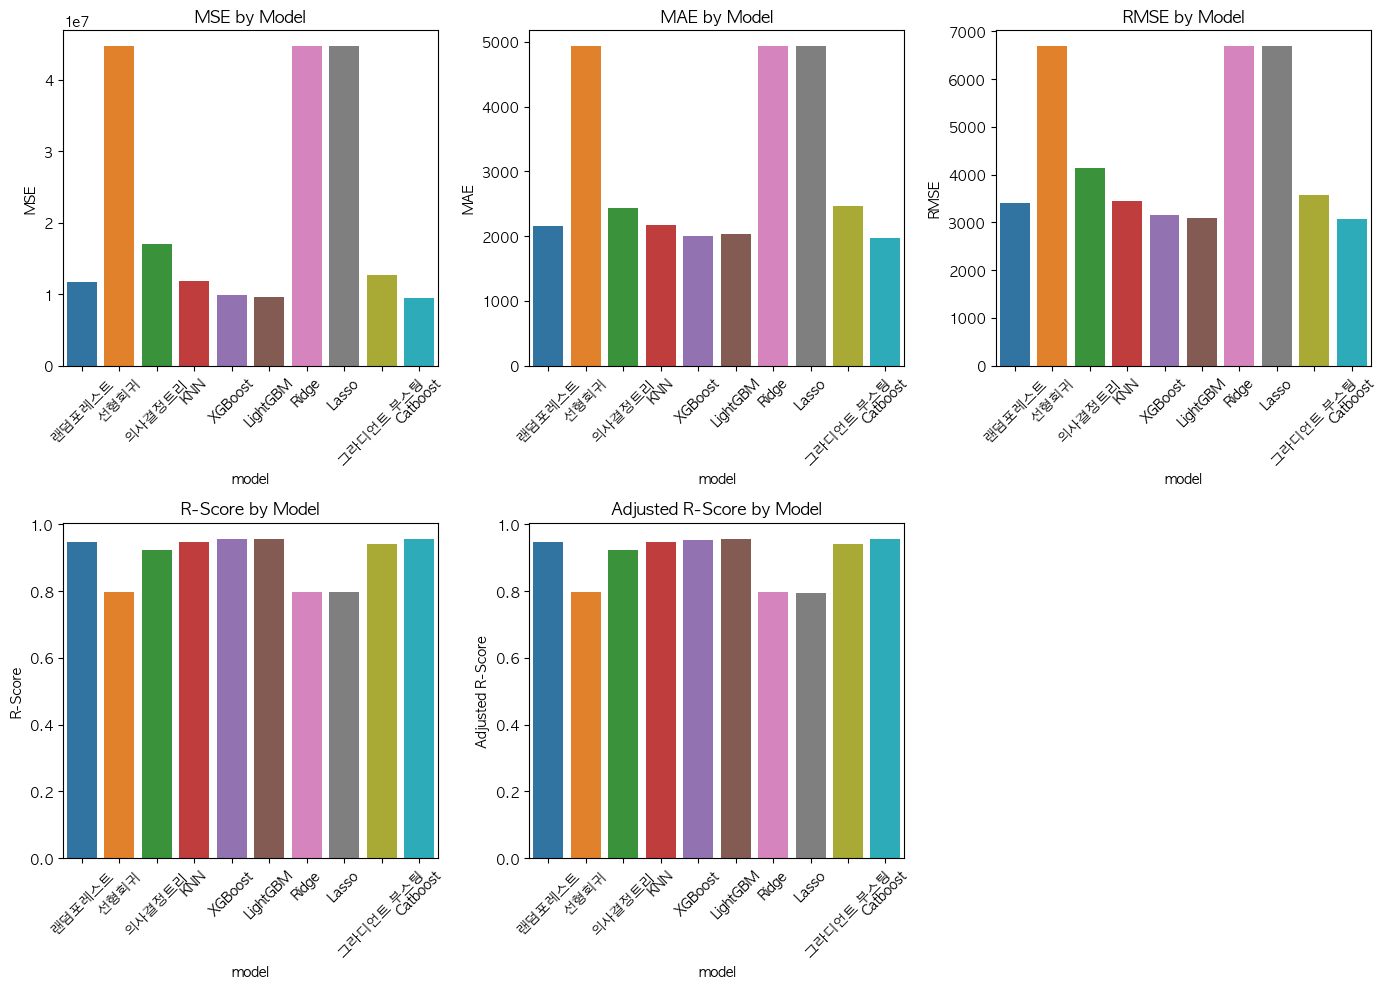

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

metrics = ['MSE', 'MAE', 'RMSE', 'R-Score', 'Adjusted R-Score']

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='model', y=metric, data=model_df)
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [36]:
# 특성 중요도 추출
feature_importances = rf.feature_importances_
x_list = x.columns.to_list()

# 특성 중요도 출력
for idx, importance in enumerate(feature_importances):
    print(f'{idx} {x_list[idx]}: {importance:.4f}')

0 층: 0.0236
1 전용면적(㎡): 0.5184
2 건축년도: 0.3038
3 위도: 0.0059
4 경도: 0.0127
5 약국: 0.0009
6 의원: 0.0061
7 일반병원: 0.0055
8 종합병원: 0.0095
9 요양병원: 0.0019
10 보건병원: 0.0021
11 한방병원: 0.0014
12 치과: 0.0032
13 대형상권: 0.0649
14 공원: 0.0072
15 도서관: 0.0048
16 카페: 0.0013
17 편의점: 0.0006
18 유치원: 0.0031
19 어린이집: 0.0032
20 초등학교: 0.0024
21 중학교: 0.0046
22 고등학교: 0.0031
23 학원: 0.0050
24 지하철: 0.0034
25 버스정류장: 0.0016


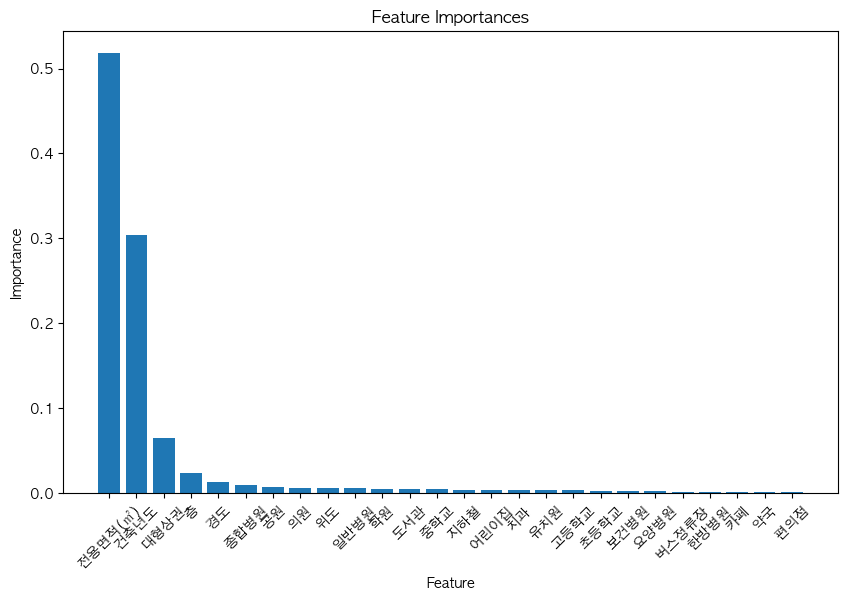

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(feature_importances)[::-1]
new_list = [x_list[i] for i in indices]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), new_list, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()